In [1]:
#!pip install lifetimes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_exist=pd.read_excel('All_cust.xlsx')
df_exist.head()

,Plant,Cust_Seg,CustID,Cust_name,ZFNP,PM,First_date,Last_date
0,Eau Claire,Independents,30792,AMSTAR GAS STATION,432160.49,13862.47,2016-10-03,2018-06-25
1,Eau Claire,Independents,30939,SUPER AMERICA 4719,834483.52,34141.29,2016-10-03,2018-06-25
2,Eau Claire,Independents,32389,ROBBINSDALE FOOD MARKET,407446.73,13229.06,2016-10-04,2018-01-16
3,Eau Claire,Independents,32394,SUPER AMERICA 4898,703542.50,29561.00,2016-10-06,2018-06-21
4,Eau Claire,Independents,32454,CASABLANCA MARKET,453622.08,13670.08,2016-10-04,2018-06-19


In [4]:
df_sales_month=pd.read_excel('Sales_monthly.xlsx')
df_sales_month.head()

,Plant,CustID,CustGrp,Jan_17,Jul_17,Aug_17,Sep_17,Oct_17,Nov_17,Dec_17,Jan_18,Feb_18,Mar_18,Apr_18,May_18,Jun_18,Total_sale
0,Montgomery,12304,CSTORE-OVER 800SQFT,102375.33,107931.74,103939.75,106077.41,103923.11,83844.94,97439.69,84857.42,82248.39,98115.73,84338.97,102510.99,109473.45,1267076.92
1,Montgomery,12459,CSTORE-UNDER 800SQFT,2213.69,4565.08,3968.08,3621.53,3650.69,2721.40,1696.51,3250.88,3723.11,2450.09,2587.58,3225.35,3350.58,41024.57
2,Montgomery,12519,CSTORE-UNDER 800SQFT,82115.25,83055.79,88329.33,85013.45,85059.73,76843.80,77222.86,71517.58,70512.38,80770.60,70098.24,89248.12,92376.59,1052163.72
3,Montgomery,12529,CSTORE-UNDER 800SQFT,51138.07,56963.76,53032.58,44199.18,56406.04,46000.72,44068.28,48968.54,43421.56,53781.96,55104.24,53569.95,44884.08,651538.96
4,Montgomery,12550,CSTORE-OVER 800SQFT,35120.06,29210.94,47714.46,29950.65,38509.83,26194.72,29346.83,35442.74,22335.95,29915.79,24303.34,42737.08,33037.81,423820.20


In [5]:
print (df_exist.shape)
print (df_sales_month.shape)
print (df_exist.nunique())
print (df_sales_month.nunique())

(5263, 8)
(5267, 17)
Plant            7
Cust_Seg         1
CustID        5263
Cust_name     4960
ZFNP          5262
PM            5258
First_date     441
Last_date      264
dtype: int64
Plant            7
CustID        5261
CustGrp          8
Jan_17        4024
Jul_17        4050
Aug_17        4132
Sep_17        4134
Oct_17        4156
Nov_17        4165
Dec_17        4156
Jan_18        4191
Feb_18        4233
Mar_18        4289
Apr_18        4277
May_18        4329
Jun_18        4290
Total_sale    5220
dtype: int64


In [6]:
df_init=pd.merge(df_exist[['CustID','ZFNP','PM','First_date','Last_date']],df_sales_month,on='CustID',how='left')
print (df_init.shape)
df_init.head()

(5269, 21)


,CustID,ZFNP,PM,First_date,Last_date,Plant,CustGrp,Jan_17,Jul_17,Aug_17,...,Oct_17,Nov_17,Dec_17,Jan_18,Feb_18,Mar_18,Apr_18,May_18,Jun_18,Total_sale
0,30792,432160.49,13862.47,2016-10-03,2018-06-25,Eau Claire,CSTORE-OVER 800SQFT,20853.68,25915.92,20708.23,...,24301.52,18810.33,18903.54,20802.61,16555.40,16979.63,21933.31,21869.61,15992.88,264886.41
1,30939,834483.52,34141.29,2016-10-03,2018-06-25,Eau Claire,CSTORE-OVER 800SQFT,49258.46,53880.89,45354.45,...,48109.45,27973.66,33440.85,34080.59,29833.29,30202.62,38845.25,40192.77,30730.14,500669.94
2,32389,407446.73,13229.06,2016-10-04,2018-01-16,Eau Claire,CSTORE-OVER 800SQFT,27677.96,29858.89,33725.08,...,31243.55,19583.76,23864.23,15621.74,NaN,NaN,NaN,NaN,NaN,207959.34
3,32394,703542.50,29561.00,2016-10-06,2018-06-21,Eau Claire,CSTORE-OVER 800SQFT,49981.84,34963.00,47655.64,...,34938.40,29396.55,27483.40,31494.57,27717.12,38179.75,33709.72,46198.78,37651.57,470570.52
4,32454,453622.08,13670.08,2016-10-04,2018-06-19,Eau Claire,CSTORE-OVER 800SQFT,23467.62,25251.50,27205.91,...,24248.49,19837.11,19792.90,22292.29,8601.91,16486.54,13744.36,23476.32,22146.85,269627.56


In [7]:
df_init1=df_init.groupby('CustID')['Jan_17','Jul_17','Aug_17','Sep_17','Oct_17','Nov_17','Dec_17',
                                   'Jan_18','Feb_18','Mar_18','Apr_18','May_18','Jun_18'].count()
df_init1['Active_Months']=df_init1.sum(axis=1)
df_init1['frequency']=df_init1['Active_Months']/13   #frequency is repeat purchases
df_init1.head()
df_init1.reset_index(inplace=True)
df_init=pd.merge(df_init,df_init1[['CustID','frequency']],on='CustID',how='left')

In [8]:
#Recency_age represents the age of the customer when they made their most recent purchases.
# Recency refers to the last time that a customer made a purchase. A customer who has made a purchase recently is more likely to make a repeat purchase than a customer who hasn’t made a purchase in a long time.
#Frequency refers to how many times a customer has made a purchase within a given time frame. A customer who makes purchases often is more likely to continue to come back than a customer who rarely makes purchases.
#Monetary Value refers to the amount of money a customer has spent within that same time frame. A customer who makes larger purchases is more likely to return than a customer who spends less.

In [9]:

df_init['First_date'] = pd.to_datetime(df_init['First_date'])
df_init['Last_date'] = pd.to_datetime(df_init['Last_date'])
df_init['Recency_age']=(df_init['Last_date']-df_init['First_date'])/ np.timedelta64(1, 'M')#.apply(lambda x: x/np.timedelta64(1,'M'))
df_init['Recency']=(pd.datetime.now().date()-df_init['Last_date'])/ np.timedelta64(1, 'M')#.apply(lambda x: x/np.timedelta64(1,'M'))
df_init['Cust_age']=(pd.datetime.now().date()-df_init['First_date'])/ np.timedelta64(1, 'M')#.apply(lambda x: x/np.timedelta64(1,'M'))
print (df_init.shape)
df_init.head()

(5269, 25)


,CustID,ZFNP,PM,First_date,Last_date,Plant,CustGrp,Jan_17,Jul_17,Aug_17,...,Feb_18,Mar_18,Apr_18,May_18,Jun_18,Total_sale,frequency,Recency_age,Recency,Cust_age
0,30792,432160.49,13862.47,2016-10-03,2018-06-25,Eau Claire,CSTORE-OVER 800SQFT,20853.68,25915.92,20708.23,...,16555.40,16979.63,21933.31,21869.61,15992.88,264886.41,1.000000,20.698577,0.821372,21.519949
1,30939,834483.52,34141.29,2016-10-03,2018-06-25,Eau Claire,CSTORE-OVER 800SQFT,49258.46,53880.89,45354.45,...,29833.29,30202.62,38845.25,40192.77,30730.14,500669.94,1.000000,20.698577,0.821372,21.519949
2,32389,407446.73,13229.06,2016-10-04,2018-01-16,Eau Claire,CSTORE-OVER 800SQFT,27677.96,29858.89,33725.08,...,NaN,NaN,NaN,NaN,NaN,207959.34,0.615385,15.408941,6.078154,21.487094
3,32394,703542.50,29561.00,2016-10-06,2018-06-21,Eau Claire,CSTORE-OVER 800SQFT,49981.84,34963.00,47655.64,...,27717.12,38179.75,33709.72,46198.78,37651.57,470570.52,1.000000,20.468593,0.952792,21.421384
4,32454,453622.08,13670.08,2016-10-04,2018-06-19,Eau Claire,CSTORE-OVER 800SQFT,23467.62,25251.50,27205.91,...,8601.91,16486.54,13744.36,23476.32,22146.85,269627.56,1.000000,20.468593,1.018501,21.487094


count    5269.000000
mean        0.800035
std         0.306392
min         0.000000
25%         0.615385
50%         1.000000
75%         1.000000
max         1.153846
Name: frequency, dtype: float64
0.0003795786676788764


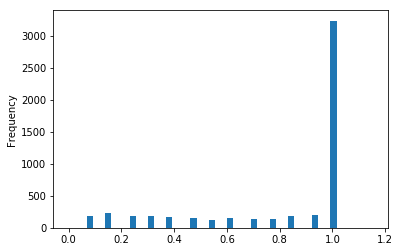

In [10]:
df_init['frequency'].plot(kind='hist', bins=50)
print(df_init['frequency'].describe())
print(sum(df_init['frequency'] == 0)/float(len(df_init)))

In [11]:
writer = pd.ExcelWriter('C:\Work_NN\PythonDirectory\churn_analysis\RFM_out.xlsx')
df_init.to_excel(writer,'RFM')
writer.save()

In [12]:
df_init.drop(df_init[df_init.frequency <=0].index,inplace=True)
df_init.shape

(5267, 25)

In [13]:
from lifetimes.plotting import *
from lifetimes.utils import *
from lifetimes.estimation import *
from lifetimes import BetaGeoFitter


In [14]:
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(df_init['frequency'], df_init['Recency_age'], df_init['Cust_age'])
print(bgf)

ValueError: There exist non-integer values in the frequency vector.

In [ ]:
from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

In [ ]:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [238]:
df_init.set_index('CustID',inplace =True)


In [239]:
t = 1
df_init['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, df_init['frequency'], df_init['Recency_age'], df_init['Cust_age'])
df_init.sort_values(by='predicted_purchases').head(10)


,ZFNP,PM,First_date,Last_date,Plant,CustGrp,Jan_17,Jul_17,Aug_17,Sep_17,...,Mar_18,Apr_18,May_18,Jun_18,Total_sale,frequency,Recency_age,Recency,Cust_age,predicted_purchases
CustID,,,,,,,,,,,,,,,,,,,,,
31045,187354.55,9417.62,2016-10-03,2017-07-10,Rockmart,CSTORE-OVER 800SQFT,22405.56,12353.85,NaN,NaN,...,NaN,NaN,NaN,NaN,34759.41,1,9.199368,12.320582,21.519949,0.137045
32295,13071.36,541.79,2016-10-03,2017-10-02,Ypsilanti,CSTORE-UNDER 800SQFT,NaN,NaN,NaN,1137.91,...,NaN,NaN,NaN,NaN,1137.91,1,11.959178,9.560771,21.519949,0.137045
18627,195413.54,7152.09,2016-10-04,2017-07-04,Rockmart,CSTORE-OVER 800SQFT,14518.62,428.32,NaN,NaN,...,NaN,NaN,NaN,NaN,14946.94,1,8.969383,12.517711,21.487094,0.137218
32115,53329.45,1727.08,2016-10-04,2017-07-11,Springfield,CSTORE-OVER 800SQFT,3665.29,889.57,NaN,NaN,...,NaN,NaN,NaN,NaN,4554.86,1,9.199368,12.287727,21.487094,0.137218
28013,77682.89,2158.99,2016-10-04,2017-07-11,Ypsilanti,CSTORE-OVER 800SQFT,9056.06,177.01,NaN,NaN,...,NaN,NaN,NaN,NaN,9233.07,1,9.199368,12.287727,21.487094,0.137218
28999,219914.48,7695.25,2016-10-04,2017-07-20,Rockmart,CSTORE-OVER 800SQFT,28782.62,12979.39,NaN,NaN,...,NaN,NaN,NaN,NaN,41762.01,1,9.495062,11.992033,21.487094,0.137218
28019,90379.70,4254.20,2016-10-04,2017-07-25,Ypsilanti,CSTORE-OVER 800SQFT,9347.28,9739.74,NaN,NaN,...,NaN,NaN,NaN,NaN,19087.02,1,9.659336,11.827758,21.487094,0.137218
22344,101524.58,3809.28,2016-10-04,2017-12-19,Montgomery,CSTORE-OVER 800SQFT,10640.23,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10640.23,1,14.489004,6.998090,21.487094,0.137219
30398,402251.11,8621.37,2016-10-05,2017-06-28,Montgomery,CSTORE-OVER 800SQFT,38254.64,-153.07,NaN,NaN,...,NaN,NaN,NaN,NaN,38101.57,1,8.739399,12.714840,21.454239,0.137391


In [240]:
print (df_init[['frequency','Recency_age','Cust_age','Total_sale','predicted_purchases']].sort_values(by='predicted_purchases').tail(20))

        frequency  Recency_age   Cust_age  Total_sale  predicted_purchases
CustID                                                                    
34116          11    10.809257  11.729194   187110.91             0.835890
33960          12    11.959178  12.911969   527722.49             0.836540
33767          12    11.959178  12.911969   118039.06             0.836540
33952          12    11.959178  12.879115    62405.51             0.838122
33518          12    11.959178  12.879115   258726.11             0.838122
33834          12    11.794903  12.780550   145824.47             0.842902
33897          12    11.827758  12.780550   225059.92             0.842902
10483          12    11.499209  12.747695    85570.03             0.844508
33977          12    11.729194  12.747695   535992.74             0.844508
33925          12    11.729194  12.714840   160921.57             0.846120
33973          12    11.729194  12.714840   611953.83             0.846120
33959          12    11.7

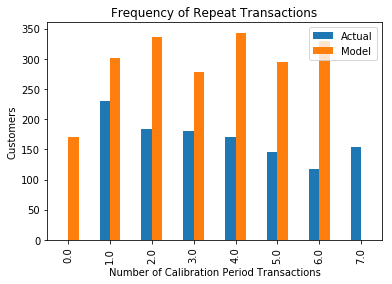

In [241]:
from lifetimes.plotting import plot_period_transactions
fig = plt.figure(figsize=(12,8))
plot_period_transactions(bgf)

In [214]:
# from lifetimes.utils import calibration_and_holdout_data
# summary_cal_holdout = calibration_and_holdout_data(df_init,'CustID','Last_date',
#                                         calibration_period_end='2018-06-30',
#                                         observation_period_end='2018-12-01' )   
# print(summary_cal_holdout.head())

KeyError: "['CustID'] not in index"

In [158]:
#df_init.reset_index(inplace=True)

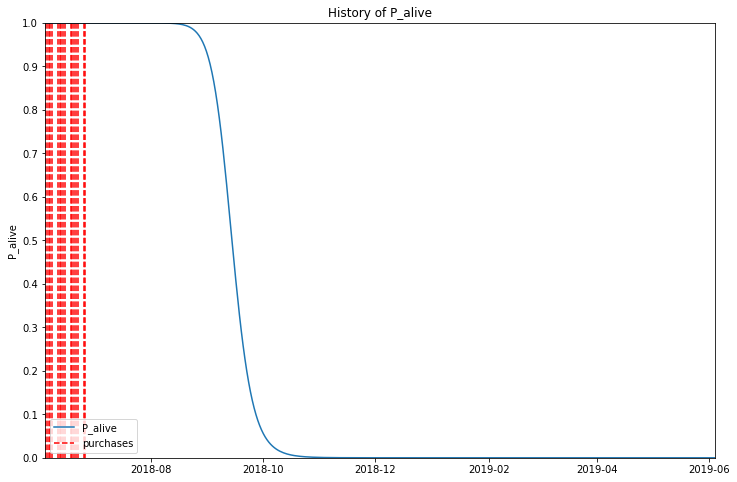

In [161]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
id = 14606
days_since_birth = 365
sp_trans = df_init.loc[df_init['frequency']==12 ]
plot_history_alive(bgf, days_since_birth, sp_trans, 'Last_date')

In [215]:
returning_customers_summary = df_init[df_init['frequency']>0]

print(returning_customers_summary.head().to_csv)
print(len(returning_customers_summary))

<bound method DataFrame.to_csv of              ZFNP        PM First_date  Last_date       Plant  \
CustID                                                          
30792   432160.49  13862.47 2016-10-03 2018-06-25  Eau Claire   
30939   834483.52  34141.29 2016-10-03 2018-06-25  Eau Claire   
32389   407446.73  13229.06 2016-10-04 2018-01-16  Eau Claire   
32394   703542.50  29561.00 2016-10-06 2018-06-21  Eau Claire   
32454   453622.08  13670.08 2016-10-04 2018-06-19  Eau Claire   

                    CustGrp    Jan_17    Jul_17    Aug_17    Sep_17  \
CustID                                                                
30792   CSTORE-OVER 800SQFT  20853.68  25915.92  20708.23  21259.75   
30939   CSTORE-OVER 800SQFT  49258.46  53880.89  45354.45  38767.52   
32389   CSTORE-OVER 800SQFT  27677.96  29858.89  33725.08  26384.13   
32394   CSTORE-OVER 800SQFT  49981.84  34963.00  47655.64  31200.18   
32454   CSTORE-OVER 800SQFT  23467.62  25251.50  27205.91  23075.76   

            

In [216]:
returning_customers_summary[['Total_sale', 'frequency']].corr()

,Total_sale,frequency
Total_sale,1.000000,0.356788
frequency,0.356788,1.000000


In [217]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['Total_sale'])
print(ggf)

ValueError: There exist non-positive values in the monetary_value vector.

In [218]:
print(ggf.conditional_expected_average_profit(
        df_init['frequency'],
        df_init['Total_sale']
    ).head(10))

ValueError: Model has not been fit yet. Please call the .fit method first.

In [220]:
bgf.fit(df_init['frequency'], df_init['Recency_age'], df_init['Cust_age'])

print(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    df_init['frequency'],
    df_init['Recency_age'],
    df_init['Cust_age'],
    df_init['Total_sale'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
).head(20))

ValueError: Model has not been fit yet. Please call the .fit method first.

In [219]:
df_init['profit']=np.round(ggf.conditional_expected_average_profit(
        df_init['frequency'],
        df_init['Total_sale']),2)
    

ValueError: Model has not been fit yet. Please call the .fit method first.

In [190]:
df_init['CLV']=np.round(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    df_init['frequency'],
    df_init['Recency_age'],
    df_init['Cust_age'],
    df_init['Total_sale'],
    time=6, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
),2)

In [192]:
df_final=df_init[['predicted_purchases','profit','Total_sale','CLV']].sort_values(by='predicted_purchases')
df_final.head()

,predicted_purchases,profit,Total_sale,CLV
CustID,,,,
11514,0.155386,334581.46,43309.77,32048478.67
31535,0.169771,334372.36,35024.54,32026784.05
27978,0.229348,322270.53,66681.30,30872378.68
31021,0.270497,311303.34,13712.46,29797959.60
34376,0.274214,333637.22,5895.12,31945682.16


In [193]:
writer = pd.ExcelWriter('C:\Work_NN\PythonDirectory\churn_analysis\CLV.xlsx')
df_final.to_excel(writer,'CLV')
writer.save()